In [1]:
import numpy as np
import pandas as pd
from sodapy import Socrata
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
# Falta hacer el git push


In [2]:
data_dir = r"C:\Users\irene\Desktop\Datos masivos\AAVV_JaraySedal\Bases de datos"
Cuarto = pd.read_csv(data_dir + r"\Cuartodatos.csv")
Sexto = pd.read_csv(data_dir + r"\Sextodatos.csv")
Cuarto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708464 entries, 0 to 708463
Data columns (total 35 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ANY            708464 non-null  int64  
 1   CODI_ALUMNE    455404 non-null  float64
 2   PCAT           680408 non-null  float64
 3   PCAT_CL        680408 non-null  float64
 4   PCAT_EE        680408 non-null  float64
 5   PCAST          669518 non-null  float64
 6   PCAST_CL       669518 non-null  float64
 7   PCAST_EE       669518 non-null  float64
 8   PANG           609790 non-null  float64
 9   PANG_CO        609790 non-null  float64
 10  PANG_CL        609790 non-null  float64
 11  PANG_EE        609458 non-null  float64
 12  PFRAN          3513 non-null    float64
 13  PFRAN_CO       3513 non-null    float64
 14  PFRAN_CL       3513 non-null    float64
 15  PFRAN_EE       71454 non-null   float64
 16  PMAT           685511 non-null  float64
 17  PMAT_EFM       685511 non-nul

In [5]:
Sexto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874280 entries, 0 to 874279
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ANY               874280 non-null  int64  
 1   CODI_ALUMNE       425463 non-null  float64
 2   PCAT              857551 non-null  float64
 3   PCAT_CL           857551 non-null  float64
 4   PCAT_EE           857551 non-null  float64
 5   PCAST             860625 non-null  float64
 6   PCAST_CL          860625 non-null  float64
 7   PCAST_EE          860625 non-null  float64
 8   PMAT              862473 non-null  float64
 9   PMAT_NC           862473 non-null  float64
 10  PMAT_EFM          862462 non-null  float64
 11  PMAT_CR           862473 non-null  float64
 12  PANG              798193 non-null  float64
 13  PANG_CO           798193 non-null  float64
 14  PANG_CE           798215 non-null  float64
 15  PFRAN             4257 non-null    float64
 16  PFRAN_CO          42

In [30]:
# Check for duplicate rows
print(Cuarto.duplicated().sum())
print(Sexto.duplicated().sum())
dupli_cuarto = Cuarto[Cuarto.duplicated()]
print(dupli_cuarto)
dupli_Sexto = Sexto[Sexto.duplicated()]
print(dupli_Sexto)

# Drop these rows from these from the data
Cuarto_no_duplicates = Cuarto.drop_duplicates()
Sexto_no_duplicates = Sexto.drop_duplicates()

# Quitar los "1" y cambiarlos por NaN en las notas de frances
#print(np.where(Cuarto_no_duplicates['PFRAN']==1))
Cuarto_no_duplicates['PFRAN'] = Cuarto_no_duplicates['PFRAN'].replace(1,np.nan, regex=True)
Sexto_no_duplicates['PFRAN'] = Sexto_no_duplicates['PFRAN'].replace(1,np.nan, regex=True)

# Bases de datos con código de alumno, asignaturas y género
Sexto_sin = Sexto_no_duplicates[['CODI_ALUMNE','PCAT','PCAST',asignatura','PANG','PMED','GENERE']].copy()
Sexto_sin_melt = Sexto_sin.melt(id_vars = ['CODI_ALUMNE','GENERE'], var_name = 'Subject', value_name='Grade')
Cuarto_sin = Cuarto_no_duplicates[['CODI_ALUMNE','PCAT','PCAST',asignatura','PANG','PCIEN','GENERE']].copy()
Cuarto_sin_melt = Cuarto_sin.melt(id_vars = ['CODI_ALUMNE','GENERE'], var_name = 'Subject', value_name='Grade')
print(Cuarto_sin_melt)
# Bases de datos con código de alumno, asignaturas, género y año
Sexto_con_año = Sexto_no_duplicates[['CODI_ALUMNE','ANY','PCAT','PCAST','PMAT','PANG','PMED','GENERE']].copy()
Cuarto_con_año = Cuarto_no_duplicates[['CODI_ALUMNE','ANY','PCAT','PCAST','PMAT','PANG','PCIEN','GENERE']].copy()


229
11
         ANY  CODI_ALUMNE  PCAT  PCAT_CL  PCAT_EE  PCAST  PCAST_CL  PCAST_EE  \
75591   2013          NaN  96.9     97.0     96.8  100.0      98.2     102.4   
97173   2013          NaN   NaN      NaN      NaN    NaN       NaN       NaN   
422936  2019          0.0   NaN      NaN      NaN    NaN       NaN       NaN   
424171  2019          0.0  83.0     80.0     87.5    NaN       NaN       NaN   
425596  2019          0.0   NaN      NaN      NaN    NaN       NaN       NaN   
...      ...          ...   ...      ...      ...    ...       ...       ...   
495161  2019          NaN  81.6     88.0     71.9    NaN       NaN       NaN   
495235  2019          NaN   NaN      NaN      NaN    NaN       NaN       NaN   
495305  2019          NaN   NaN      NaN      NaN    NaN       NaN       NaN   
495337  2019          NaN  71.7     84.0     53.1    NaN       NaN       NaN   
495387  2019          NaN   NaN      NaN      NaN    NaN       NaN       NaN   

        PANG  PANG_CO  ...  PCIE

C:\Users\irene\AppData\Local\Temp\ipykernel_4440\2800615457.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cuarto_no_duplicates['PFRAN'] = Cuarto_no_duplicates['PFRAN'].replace(1,np.nan, regex=True)
C:\Users\irene\AppData\Local\Temp\ipykernel_4440\2800615457.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sexto_no_duplicates['PFRAN'] = Sexto_no_duplicates['PFRAN'].replace(1,np.nan, regex=True)


          CODI_ALUMNE GENERE Subject  Grade
0                 NaN      D    PCAT  85.30
1                 NaN      H    PCAT  68.30
2                 NaN      H    PCAT  69.80
3                 NaN      H    PCAT  88.40
4                 NaN      D    PCAT  90.40
...               ...    ...     ...    ...
3541170  5.407553e+09      H   PCIEN  55.19
3541171  5.407452e+09      H   PCIEN  48.33
3541172  7.102942e+09      D   PCIEN  84.07
3541173  5.406879e+09      D   PCIEN  34.81
3541174  6.958307e+09      D   PCIEN  16.30

[3541175 rows x 4 columns]


c:\Users\irene\anaconda3\envs\newenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irene\anaconda3\envs\newenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irene\anaconda3\envs\newenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\irene\anaconda3\envs\newenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

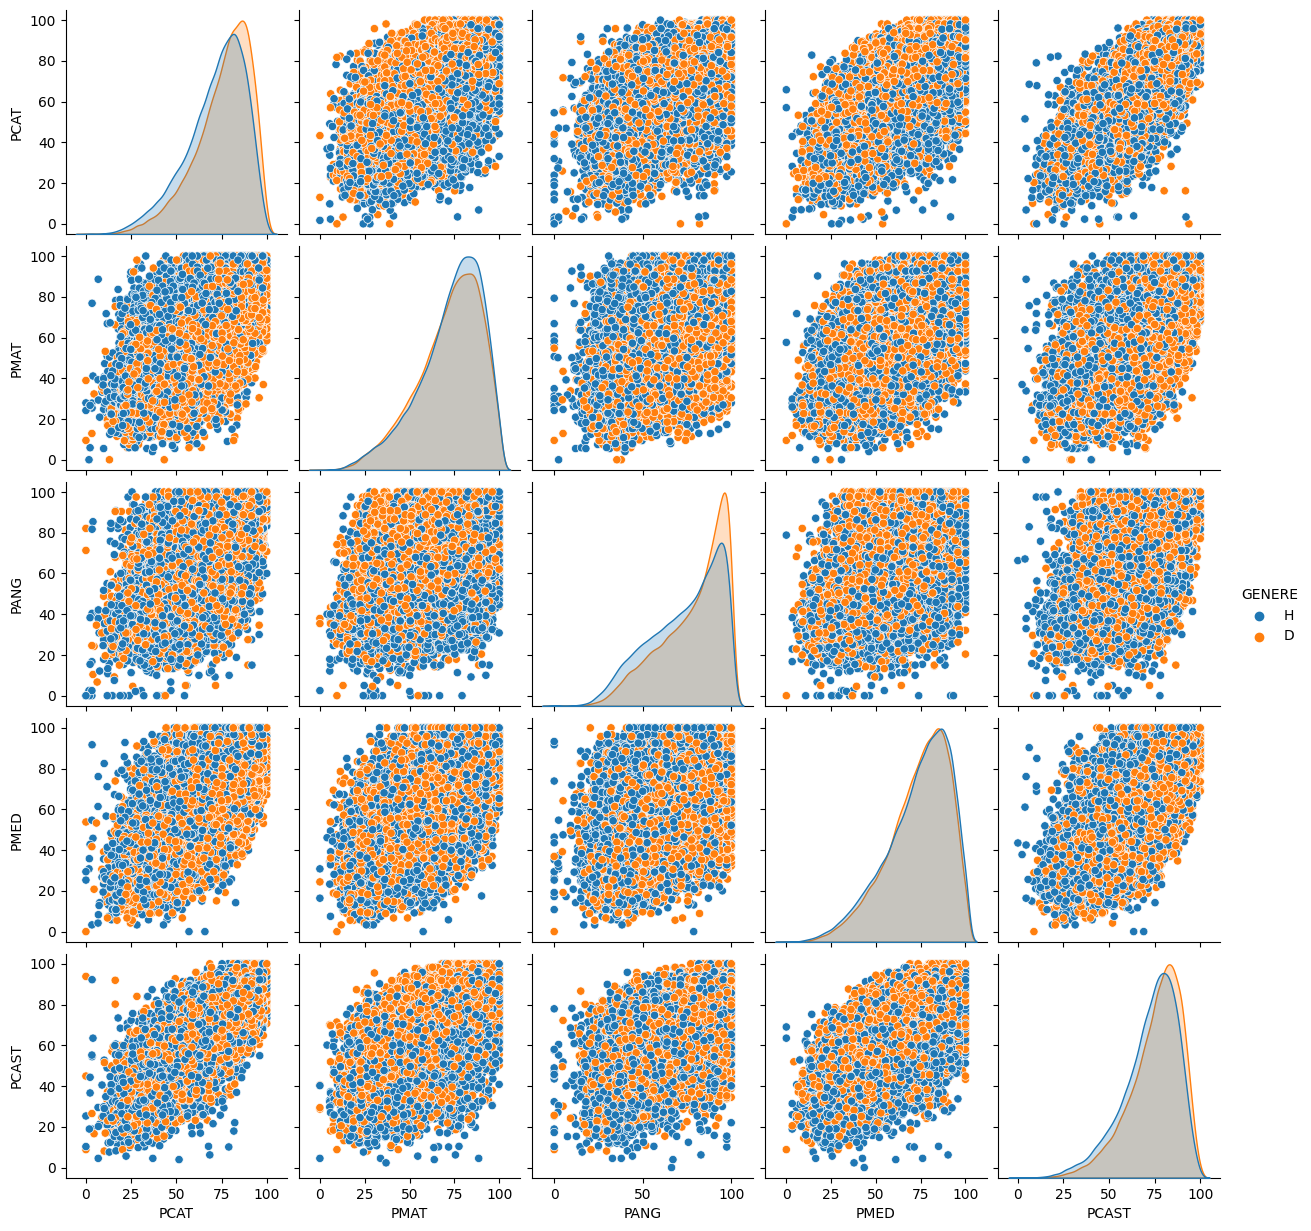

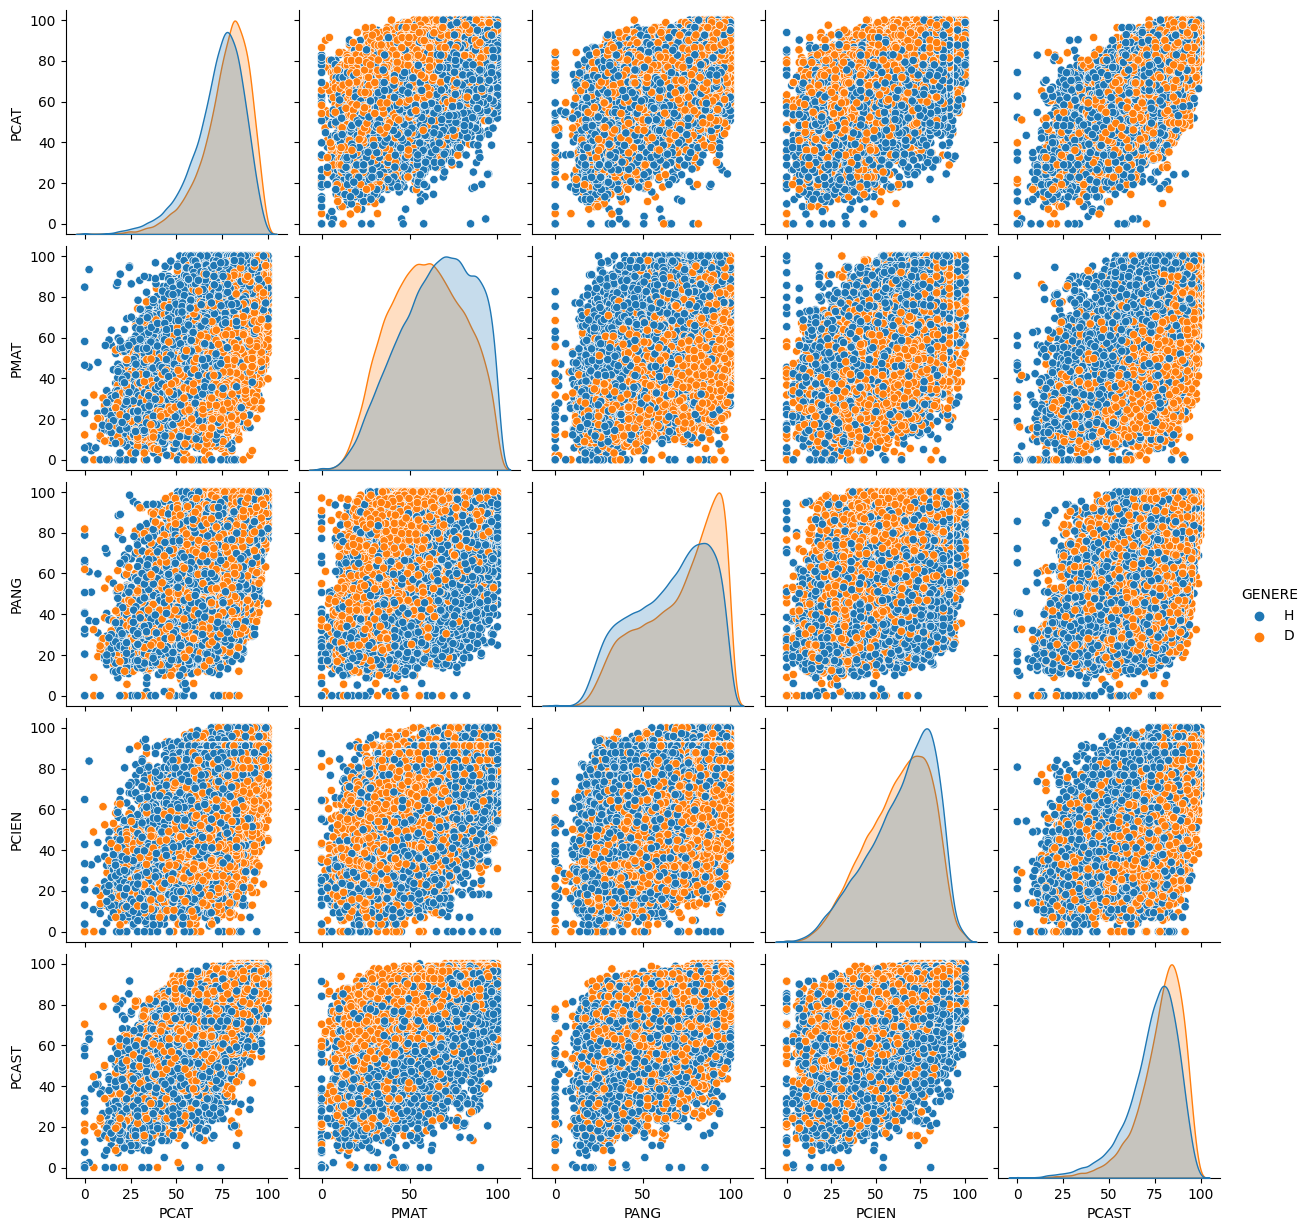

In [18]:
# Gráfico de las correlaciones entre las asignaturas 

filtro = ['PCAT', 'PMAT', 'GENERE', 'PANG', 'PMED', 'PCAST']
sns.pairplot(Sexto_no_duplicates[filtro][-100000:], hue='GENERE')
filtro_2 = ['PCAT', 'PMAT', 'GENERE', 'PANG', 'PCIEN', 'PCAST']
sns.pairplot(Cuarto_no_duplicates[filtro_2][-100000:], hue='GENERE')

# 100.000 ha tardado 6 minutos

In [27]:
# Check how many students are in both datasets
# Compute the same correlations
Sexto_no_duplicates['CODI_ALUMNE']

dupli_cuarto = Cuarto_no_duplicates[Cuarto_no_duplicates.duplicated(['CODI_ALUMNE'])]
print(dupli_cuarto.sum())
dupli_Sexto = Sexto_no_duplicates[Sexto_no_duplicates.duplicated(['CODI_ALUMNE'])]
print(dupli_Sexto.sum())
#column_name = 'CODI_ALUMNE'
#Sexto_no_duplicates.intersection(Cuarto_no_duplicates)




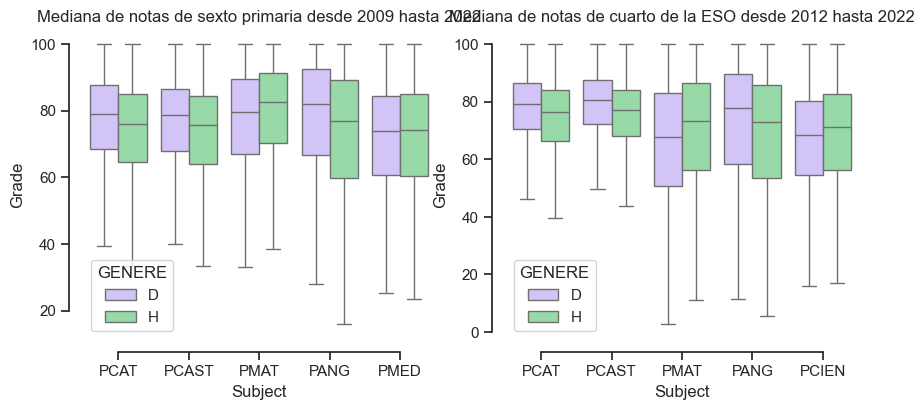

In [129]:
plt.figure(figsize=(10,4))

sns.set_theme(style="ticks", palette="pastel")

plt.subplot(1, 2, 1)
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Subject", y="Grade",
            hue="GENERE", palette=["m", "g"],
            data=Sexto_sin_melt, showfliers=False)
sns.despine(offset=10, trim=True)
plt.title('Mediana de notas de sexto primaria desde 2009 hasta 2022')
plt.subplot(1, 2, 2)
sns.boxplot(x="Subject", y="Grade",
            hue="GENERE", palette=["m", "g"],
            data=Cuarto_sin_melt, showfliers=False)
sns.despine(offset=10, trim=True)
plt.title('Mediana de notas de cuarto de la ESO desde 2012 hasta 2022')
plt.show()

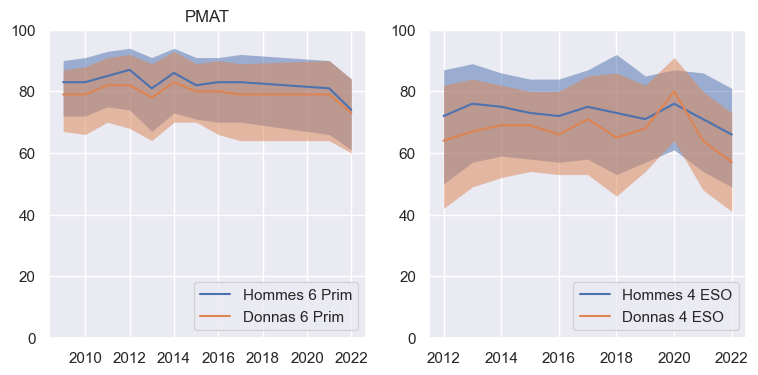

In [126]:
sns.set_theme(style="darkgrid")
# Array eje x= años
fig, ax = plt.subplots(1,2,figsize = (9, 4))
def plotyears(df, year, genre, homme,subject, legend,ax, sexto):
    if sexto==True:
        years1 = np.arange(df[year].min(), 2018)
        years2 = np.arange(2021, df[year].max()+1)
        years = np.concatenate((years1, years2))
    else:
        years = np.arange(df[year].min(), df[year].max()+1)
    medians = np.arange(len(years))
    q025 = np.arange(len(years))
    q075 = np.arange(len(years))
    for i in range(len(years)):
        people = df[(df[genre]==homme)&(df[year]==years[i])]
        medians[i]= people[subject].median()
        q025[i] = people[subject].quantile(0.25)
        q075[i]= people[subject].quantile(0.75)
    ax.plot(years, medians, label = legend)
    ax.fill_between(years, q025, q075, alpha=.5, linewidth=0)
    ax.set_ylim([0,100])
    ax.legend(loc= 'lower right')

asignatura = 'PMAT' 
plotyears(Cuarto_con_año, 'ANY', 'GENERE','H',asignatura, 'Hommes 4 ESO', ax[1], False)
plotyears(Cuarto_con_año, 'ANY', 'GENERE','D', asignatura, 'Donnas 4 ESO', ax[1], False)
plotyears(Sexto_con_año, 'ANY', 'GENERE','H', asignatura, 'Hommes 6 Prim', ax[0], True)
plotyears(Sexto_con_año, 'ANY', 'GENERE','D', asignatura,  'Donnas 6 Prim', ax[0], True)
ax[0].set_title(asignatura)
import matplotlib.ticker as ticker
# Set integer formatter for the x-axis on the right plot
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

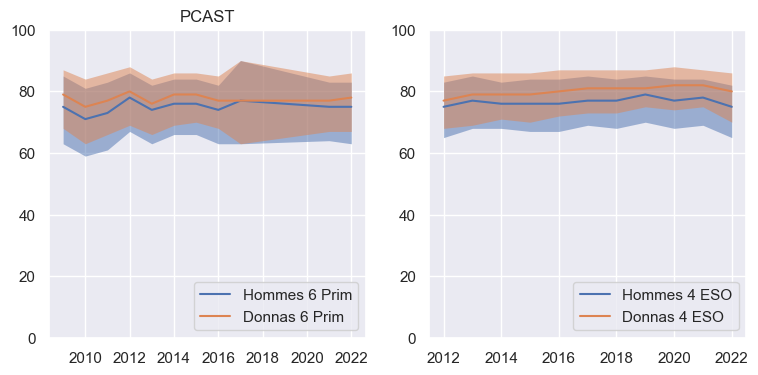

In [127]:
asignatura = 'PCAST'
sns.set_theme(style="darkgrid")
# Array eje x= años
fig, ax = plt.subplots(1,2,figsize = (9, 4))
plotyears(Cuarto_con_año, 'ANY', 'GENERE','H',asignatura, 'Hommes 4 ESO', ax[1], False)
plotyears(Cuarto_con_año, 'ANY', 'GENERE','D', asignatura, 'Donnas 4 ESO', ax[1], False)
plotyears(Sexto_con_año, 'ANY', 'GENERE','H', asignatura, 'Hommes 6 Prim', ax[0], True)
plotyears(Sexto_con_año, 'ANY', 'GENERE','D', asignatura,  'Donnas 6 Prim', ax[0], True)
ax[0].set_title(asignatura)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

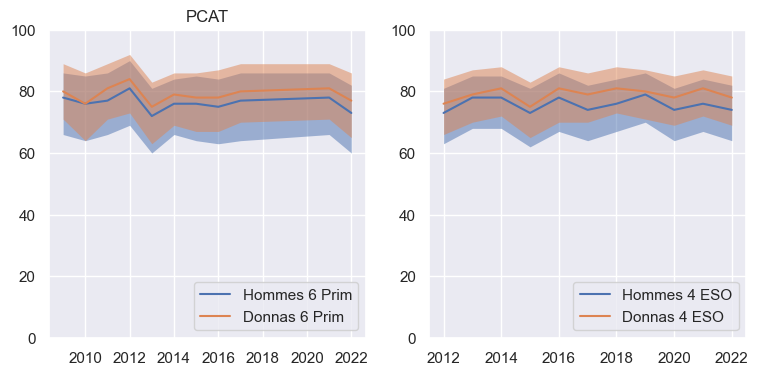

In [128]:
asignatura = 'PCAT'
sns.set_theme(style="darkgrid")
# Array eje x= años
fig, ax = plt.subplots(1,2,figsize = (9, 4))
plotyears(Cuarto_con_año, 'ANY', 'GENERE','H',asignatura, 'Hommes 4 ESO', ax[1], False)
plotyears(Cuarto_con_año, 'ANY', 'GENERE','D', asignatura, 'Donnas 4 ESO', ax[1], False)
plotyears(Sexto_con_año, 'ANY', 'GENERE','H', asignatura, 'Hommes 6 Prim', ax[0], True)
plotyears(Sexto_con_año, 'ANY', 'GENERE','D', asignatura,  'Donnas 6 Prim', ax[0], True)
ax[0].set_title(asignatura)
ax[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax[0].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

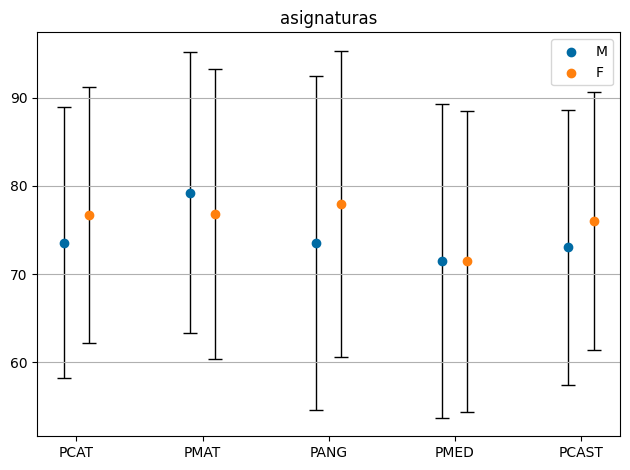

In [25]:
def plot_averages_double(primary_df,fields_1,title):
    with plt.style.context(("tableau-colorblind10",)):
        #Separate the males and females
        males = primary_df[primary_df['GENERE']=='H']
        females = primary_df[primary_df['GENERE']=='D']
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.scatter(np.arange(len(fields_1))-0.1, males[fields_1].mean(), label = "M", zorder = 2)
        ax.scatter(np.arange(len(fields_1))+0.1, females[fields_1].mean(), label = "F", zorder =2)
        ax.errorbar(np.arange(len(fields_1))-0.1, males[fields_1].mean(), yerr=males[fields_1].std(), fmt='none', color = 'black', linewidth = 1, zorder = 1, capsize = 5)
        ax.errorbar(np.arange(len(fields_1))+0.1, females[fields_1].mean(), yerr=females[fields_1].std(), fmt='none', color = 'black', linewidth = 1, zorder =1, capsize = 5)
        ax.set_xticks(np.arange(len(fields_1)))
        ax.set_xticklabels(fields_1)
        ax.yaxis.grid(True)
        ax.legend()
        plt.tight_layout()
        plt.show()
filtro_6 = ['PCAT', 'PMAT', 'PANG', 'PMED', 'PCAST']
filtro_4 = ['PCAT', 'PMAT', 'PANG', 'PCIEN', 'PCAST']
plot_averages_double(Sexto_no_duplicates, filtro_6, 'asignaturas 6 primaria')


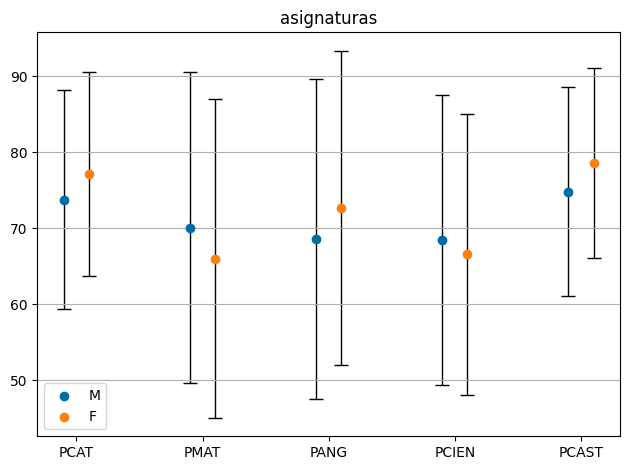

In [26]:
plot_averages_double(Cuarto_no_duplicates, filtro_4, 'asignaturas 4 ESO')


In [7]:
Sexto_no_duplicates.groupby(['GENERE'])['PCAT'].agg(['mean','std']).reset_index()

GENERE       mean        std
0      D  76.699192  14.479321
1      H  73.535963  15.343355

In [ ]:
Sexto_no_duplicates.set_index('GENERE', inplace=True)

fig, ax = plt.subplots()
ax.set_title(title)
ax.scatter(np.arange(len(1))-0.1, selected_values.mean(), label = "Media notas chicos cat", zorder = 2)
ax.errorbar(np.arange(len(1))-0.1, selected_values.mean(), yerr=selected_values.std(), fmt='none', color = 'black', linewidth = 1, zorder = 1, capsize = 5)
ax.set_xticks(np.arange(len(1)))
ax.set_xticklabels(1)
ax.yaxis.grid(True)
ax.legend()
plt.tight_layout()